EXPLORATORY DATA ANALYSYS

The main objectives for this notebook are:
1. Explore the clean dataset by performing univariate analysis
2. Investiage the relationships between  features and your target 
3. Extract relevant insights to share with business stakeholders

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Firstly, lets double-check if there are any nulls and see if all columns have proper data type

In [3]:
df = pd.read_csv(('masterfile done.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1456 non-null   int64  
 1   team kpm         1456 non-null   float64
 2   dragons          1456 non-null   float64
 3   barons           1456 non-null   float64
 4   towers           1456 non-null   float64
 5   dpm              1456 non-null   float64
 6   vspm             1456 non-null   float64
 7   earned gpm       1456 non-null   float64
 8   monsterkills_pm  1456 non-null   float64
 9   cspm             1456 non-null   float64
 10  goldat15         1456 non-null   float64
 11  xpat15           1456 non-null   float64
 12  future result    1456 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 148.0 KB


As we can see above the datatype for all columns is correct and there are no nulls, we can move forward to the visualisation part

Now, let's take a look at the distribution of positive and negative class

C:\Users\Jakub\AppData\Local\Temp\ipykernel_5372\3355587870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df,x= 'future result', palette="flare")


<Axes: xlabel='future result', ylabel='count'>

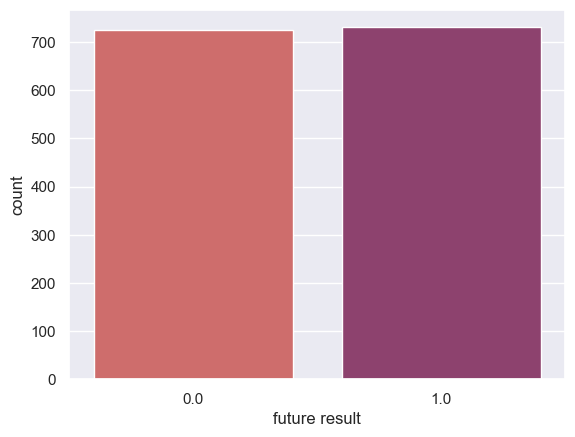

In [9]:
sns.set_style("darkgrid")
sns.set_context('notebook')
sns.countplot(data= df,x= 'future result', palette="flare")

As can be observed on the countplot, the clases are balnced. This means that the best metric to measure the performance is accuracy

First let's look at the correlation heatmap to identify how do the variables behave and strongly are they correlated with the result

Text(0.5, 1.0, 'Correlation Heatmap')

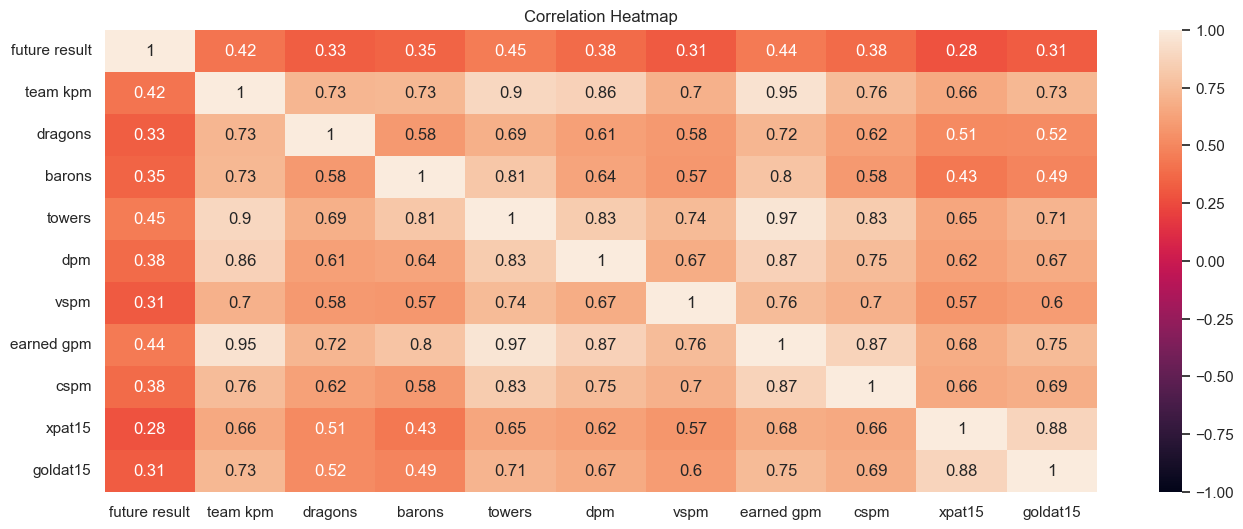

In [11]:
df_heatmap = df[['future result', 'team kpm','dragons','barons','towers','dpm','vspm','earned gpm','cspm','xpat15','goldat15']]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

OBSERVATIONS

1. We can see that the predictors are moderately correlated with "future result". The variable that has the highest correlation between itself and the "future result" is "towers" followed closely by "earned gpm" and "team kpm". The "team kpm" and "earned gpm" being in top three doesn't surprise me, but I must admitt that I am surprised by the variable "towers".
2. There is a very high degree of correlation between variables (up to 0.97! for "towers" and "earned gpm") will most likely lead to the issue of colinearity if thse variables are used together in the same model

INSIGHTS

1. The advantage at 15 min mark isn't as decisive as many belive (corr with the future result is only 0.31)
2. Consistantly winning teams stand out by earning as much gold as possible and creating space by taking the towers 

Let's visualise how closely correlated, the three best predictors are

<Axes: xlabel='towers', ylabel='earned gpm'>

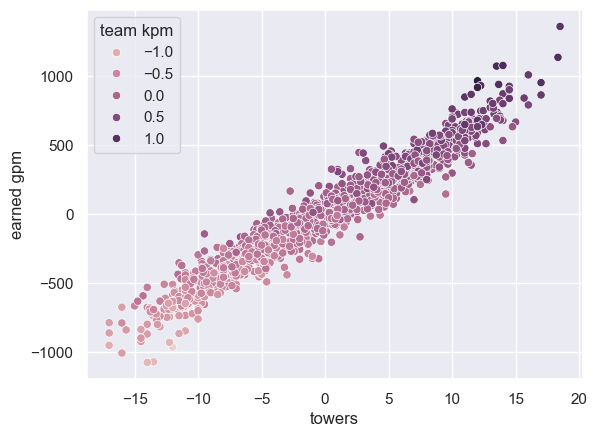

In [28]:
sns.scatterplot(data= df, x= 'towers', y= 'earned gpm', hue= 'team kpm')

The scatterplot confirms the strong correlation

<Figure size 100x100 with 0 Axes>

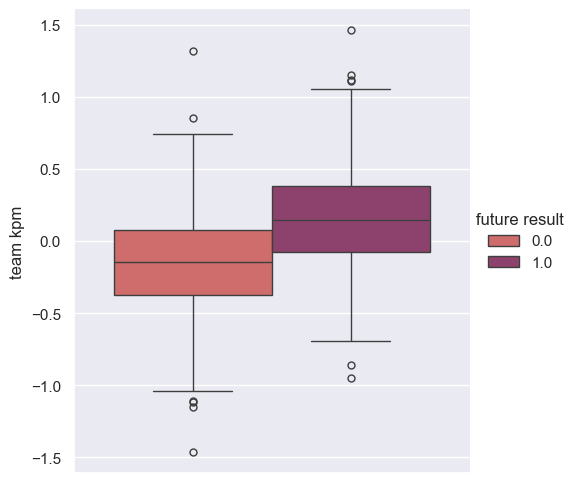

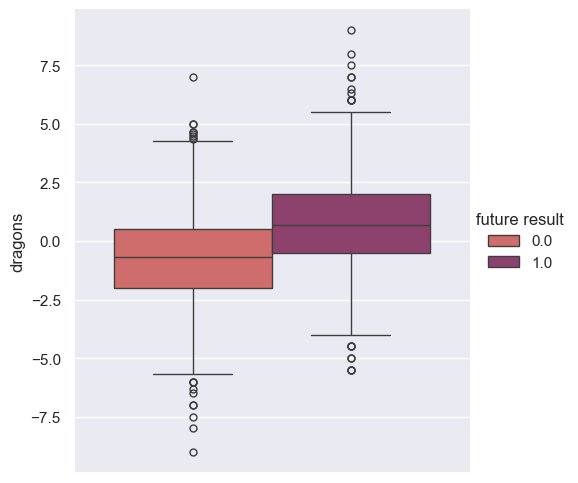

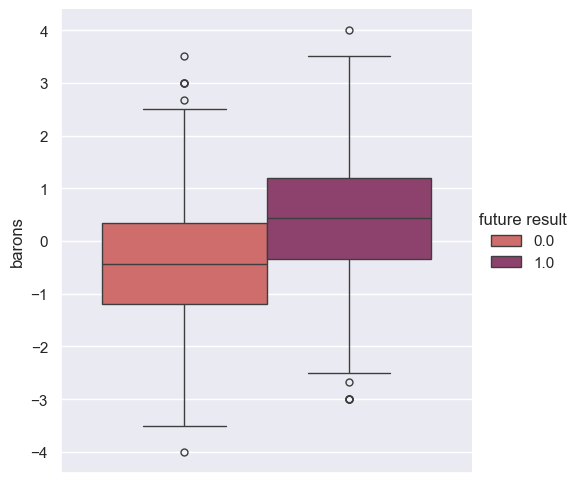

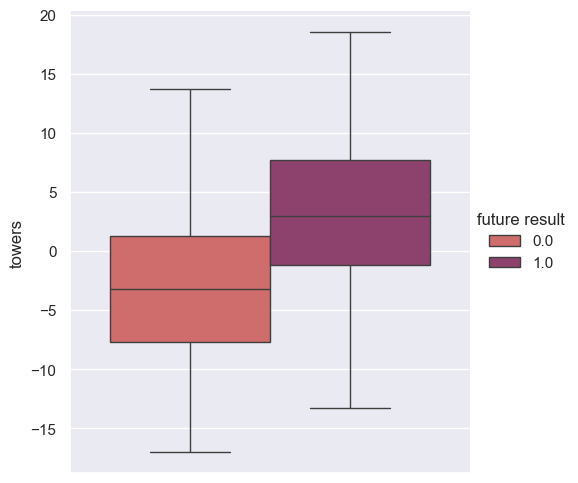

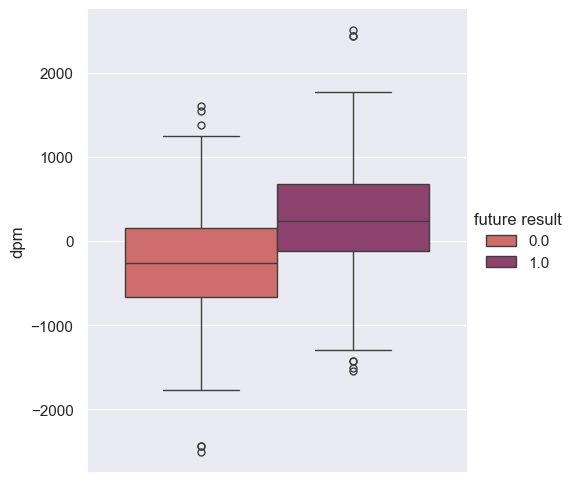

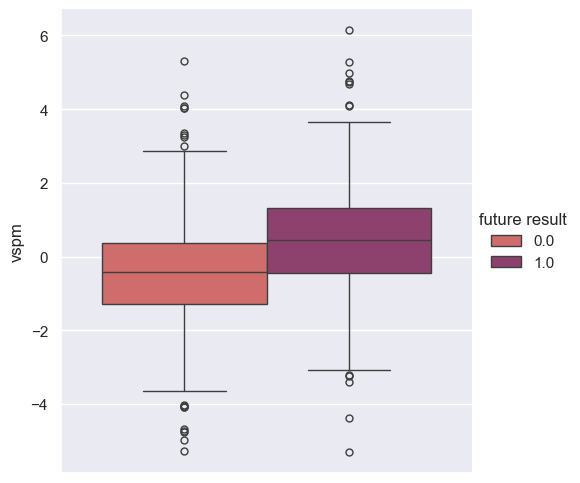

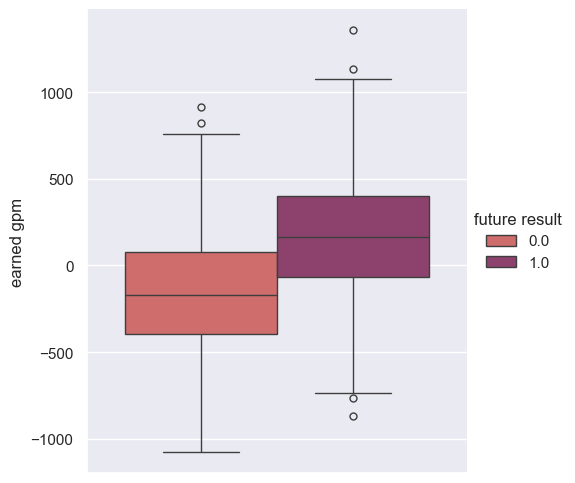

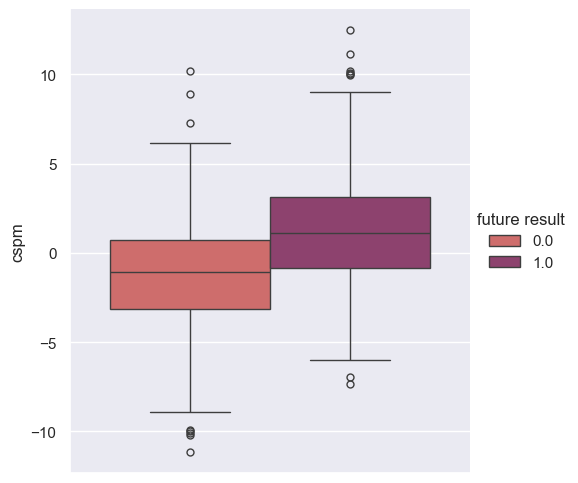

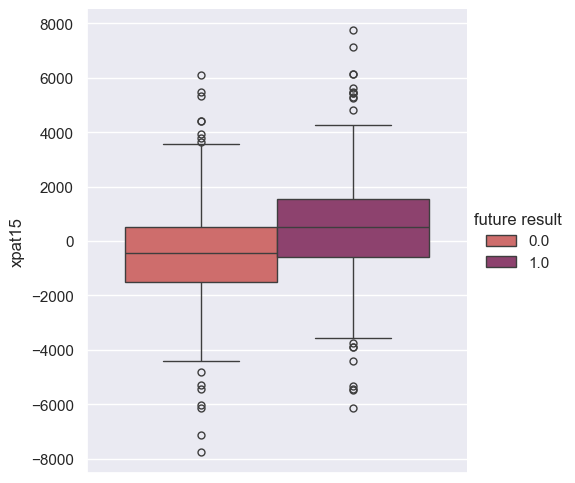

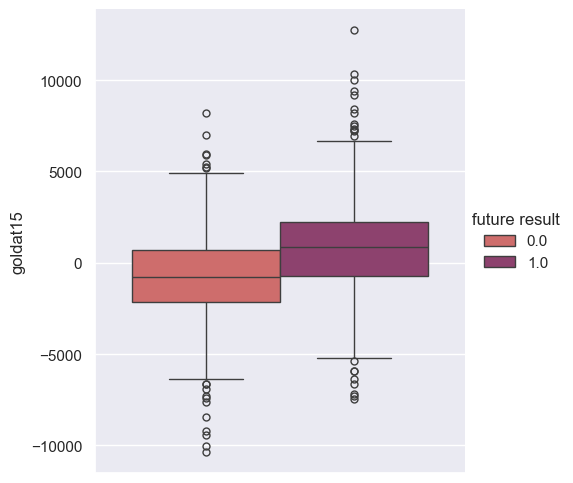

In [20]:
sns.set_style("darkgrid")
sns.set_context('notebook')
plt.figure(figsize=(1, 1))
ax = sns.catplot(data= df, y= 'team kpm', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'dragons', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'barons', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'towers', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'dpm', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'vspm', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'earned gpm', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'cspm', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'xpat15', kind= 'box', hue= 'future result', palette="flare")
ax = sns.catplot(data= df, y= 'goldat15', kind= 'box', hue= 'future result', palette="flare")

As we can see in the boxplots section, there are many outliers but they seem to be consistant with the thesis (take a look at the "cspm" and "vspm" boxplots). Thats why I decided not to get rid of them

HYPOTHESIS

Since the past results of a particular team show at least moderate correlation with the future results, I'd like to test if they are reliable predictors of the outcome of the next match

**SUMMARY**

Main Insights
1. The predictors are highly correlated with one another. This may lead to colinearity issue
2. The teams that are consistant with generating gold and taking towers tend to win more often
3. The advantage accumulated during the earlygame is NOT a good of wether a team will win

Highlight for point 2

<Axes: xlabel='towers', ylabel='earned gpm'>

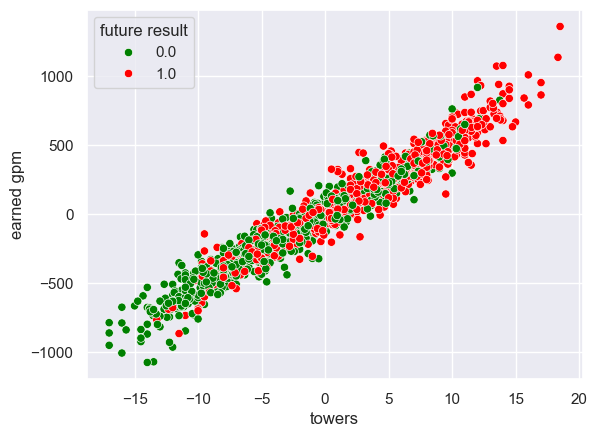

In [34]:
sns.scatterplot(data= df, x= 'towers', y= 'earned gpm', hue= 'future result', palette=['g', 'r'])

Highlight for point 3

<Axes: xlabel='xpat15', ylabel='goldat15'>

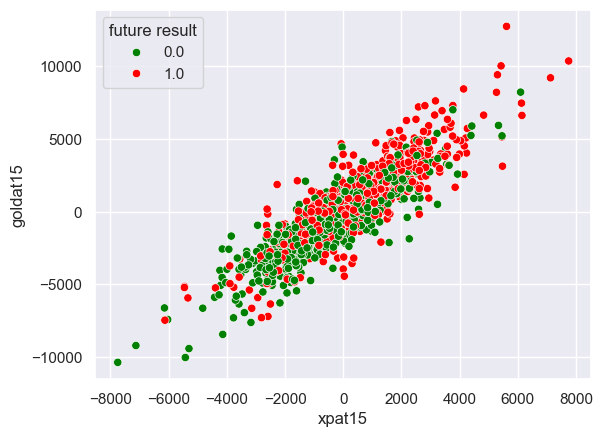

In [33]:
sns.scatterplot(data= df, x= 'xpat15', y= 'goldat15', hue= 'future result', palette=['g', 'r'])